In [49]:
import os
import numpy as np
from PIL import Image

class PPM2grey:
    def __init__(self):
        
            #Global variable to hold 2-D arrays Edge images formed by applying Sobel filter
        
            self.dximg=None  #for holding x-gradient, not normalized Edge image array from Sobel–Feldman operator
            self.dyimg=None  #for holding y-gradient, not normalized Edge image array from Sobel–Feldman operator
            
            self.height = 0
            self.width=0
        

    def pgm_read(self,file):
            '''
            pgm_read module reads pgm file and returns 2-D array of float type
            '''
        
            #Importing pgm image file using PIL module 
            real_image=Image.open(file)
            
            #Converting ppm image file into 2-D array using numpy module with float values of 16 bits each
            
            real_image_arr=np.asarray(real_image,dtype=np.float16)
            real_arr=real_image_arr.copy()
            
            #getting the height and width of the pgm image
            shape = real_image_arr.shape
            self.height = shape[0]
            self.width =  shape[1]

            
            return real_arr


    def pgm_conv(self,image_array, Gradient):
        
        '''
        pgm_conv module reads 2-D array return by pgm_read
        and applies X-gradient or Y-gradient Sobel–Feldman operator, 
        according to the input 'x' or 'y' respectively, and 
        returns float type array according to the input Gradient type i.e. x or y.

        '''
        #--x_sobel and y_sobel are two separate 1-D kernels for Sobel–Feldman operator, rather than one 2-D kernel--

        
        if Gradient=='x':
        #--x_sobel and y_sobel, for kernel rows and columns respectively--

                    
                    x_sobel=[-1,0,1]
                    y_sobel=[1,2,1]
                    
        elif Gradient=='y':
        #--x_sobel and y_sobel, for kernel rows and columns respectively--

                    x_sobel=[1,2,1]
                    y_sobel=[-1,0,1]
        else:
            return


            
            
            
        #--creating a copy of the 2-D array of Float type for holding array values after applying row kernel
        X_buffer = image_array.copy()
            
            
        #--creating a copy of the 2-D array of Float type for holding array values after applying column kernel
        Y_buffer = image_array.copy()
            
            
            
        #-----x_sobel kernel values= [1,2,1]-------
        for i in range(1,self.height-1):
                    Left=0
                    up=0
                    Right=0
                    
                    for j in range(1,self.width-1):
                        
                        Left= (image_array[i][j-1] * x_sobel[0])
                        current= (image_array[i][j] * x_sobel[1])
                        Right= (image_array[i][j+1] * x_sobel[2])
                        
                        val= (Left + current + Right)
                        
                        X_buffer[i][j]= val
                        
                        
        #X_buffer array of float type is obtained after applying x_sobel(row kernel) on original image array    
        #X_buffer array would be used as input array for applying y_sobel(column kernel)
          
        #-----y_sobel kernel values= [-1,0,1]-------
        for i in range(1,self.height-1):
                    up= 0
                    current= 0
                    down= 0
                    for j in range(1,self.width-1):
                        
                        up= (X_buffer[i-1][j] * y_sobel[0])
                        current= (X_buffer[i][j] * y_sobel[1])
                        down= (X_buffer[i+1][j] * y_sobel[2])
                        
                        val= up +current+ down

                        Y_buffer[i][j]= val
                        
                        
         #Y_buffer array of float type is obtained after applying y_sobel(column kernel) on X_buffer  
     

        if Gradient=='x':
                #for holding x-gradient, not normalized Edge image array from Sobel–Feldman operator
                #Y_buffer array of float type is converted to 8-bit unisigned integer 
                self.dximg = Y_buffer.astype(np.uint8)
                
        elif Gradient=='y':
                #for holding y-gradient, not normalized Edge image array from Sobel–Feldman operator
                #Y_buffer array of float type is converted to 8-bit unisigned integer 
                self.dyimg= Y_buffer.astype(np.uint8)
        
        #Y_buffer array of float type return of gradient provided as an input 

        return Y_buffer


 
    def pgm_normalize(self, image_array):
                
            '''
            pgm_normalize module reads the 2-D array and scale the values of the given array between 0-255
            and returns the array in 8 bit unsigned integer type
            '''
            old_max=image_array.max()
            old_min=image_array.min()
            old_range=old_max - old_min

            new_min=0.0
            new_max=255.0
            new_range=new_max - new_min

            for i in range(1,self.height-1):
                    for j in range(1,self.width-1):
                            old_val= image_array[i][j]
                            scale=(old_val-old_min)/old_range
                            
                            new_val=(new_range*scale)+new_min
                            image_array[i][j]= int(new_val)
                            
            image_array = image_array.astype(np.uint8)
            return image_array

    
            
    def pgm_write(self ,image_array, file_name):            
            
            #creating an output file for pgm greyscale image
            pgm_grey = file_name
            
            
            #opening the output file in Output directory 
            #os.getcwd() returns current working directory, this program would work for linux and macos 
            #as /Output/ has forward slash and windows operating system uses backward slash
            file= os.getcwd()+'/Output/'+file_name
            fout_pgm=open(file,'wb')

            
            # define PGM Header with magic number P5
            pgmHeader = 'P5' + '\n' + str(self.width) + '  ' + str(self.height) + '  ' + str(255) + '\n'
            #encode() for converting pgmheader from 'string' type to 'byte', and writing it in the output file
            fout_pgm.write(pgmHeader.encode())


            image_array.tofile(fout_pgm)
            
            fout_pgm.close()
    
    def pgm_free(self):
        ''' pgm_free module for deleting all output files, not the memory occupied for arrays,
            as python has garbage collector
        '''
        try:
            os.remove('Output/dxgrey.pgm')
        except:
            print('dxgrey.pgm does not exist!')
        try:
            os.remove('Output/dygrey.pgm')
        except:
            print('dygrey.pgm does not exist!')
        try:
            os.remove('Output/ndxgrey.pgm')
        except:
            print('ndxgrey.pgm does not exist!')
        try:
             os.remove('Output/ndygrey.pgm')        
        except:
            print('ndygrey.pgm does not exist!')

        
            
if __name__=='__main__':
    #assigning file location to file
    file='Images/bridge.pgm'
    
    #creating a PPM2grey() object to operate all image operations using it
    new_obj=PPM2grey()
    
    #allocate image of given size
    gimg = new_obj.pgm_read(file)
    
    # convolve the giving image array, by applying both x and y gradient
    ndximg= new_obj.pgm_conv(gimg, 'x') #unnormalized array of edges, after applying x gradient kernel
    ndyimg= new_obj.pgm_conv(gimg, 'y') #unnormalized array of edges, after applying y gradient kernel
    
    #copy edge image array and normalize, for visualization purposes
    
    #normalizing the unnormalized array of edges got after applying x gradient kernel
    ndximg=new_obj.pgm_normalize(ndximg)
    new_obj.pgm_write(ndximg,'ndxgrey.pgm') #output the normalized pgm file in Output directory

    #normalizing the unnormalized array of edges got after applying y gradient kernel
    ndyimg=new_obj.pgm_normalize(ndyimg)
    new_obj.pgm_write(ndyimg,'ndygrey.pgm') #output the normalized pgm file in Output directory
    
    
    #output to file
    new_obj.pgm_write(new_obj.dximg, "dxgrey.pgm") #output the unnormalized pgm file in Output directory
    new_obj.pgm_write(new_obj.dyimg, "dygrey.pgm") #output the unnormalized pgm file in Output directory
    

    

        

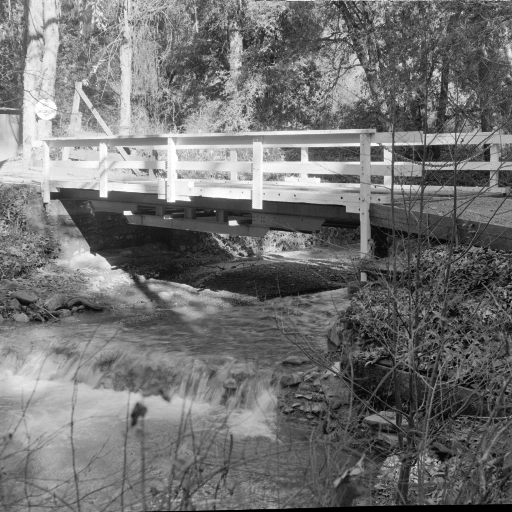

In [59]:
#orignal image
Image.open('Images/bridge.pgm')

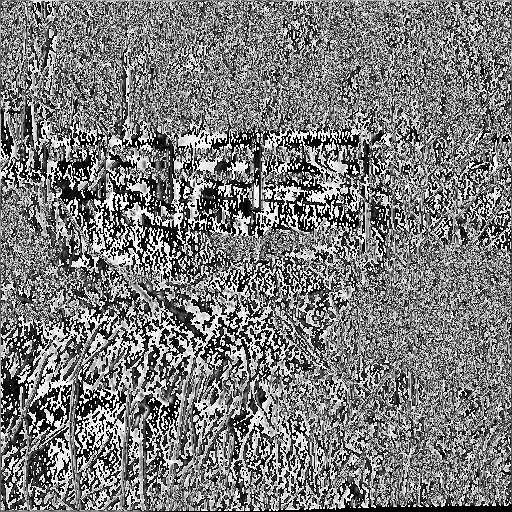

In [51]:
#Result for unnormalized image array after applying x gradient kernel
Image.open('Output/dxgrey.pgm')

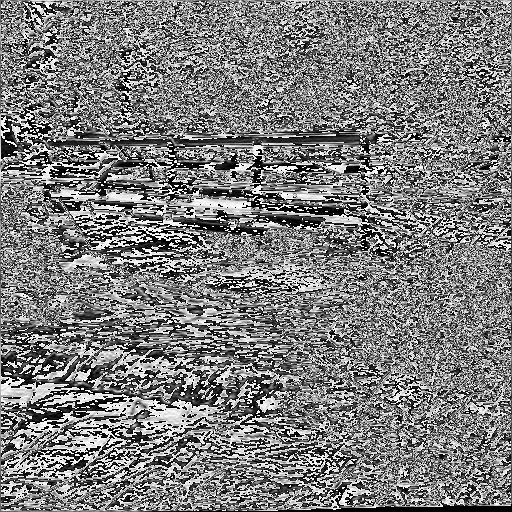

In [55]:
#Result for unnormalized image array after applying y gradient kernel
Image.open('Output/dygrey.pgm')

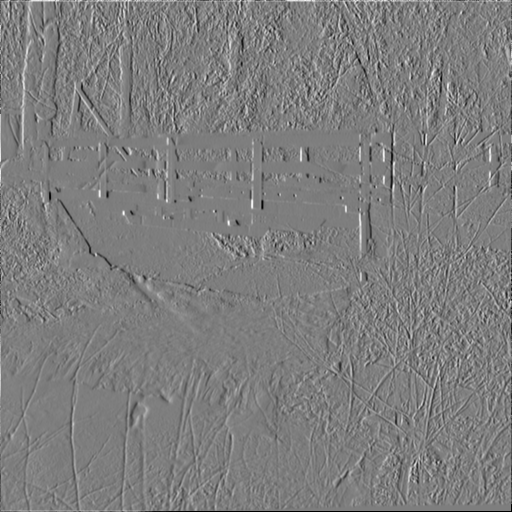

In [56]:
#Result for normalized image array after applying x gradient kernel
Image.open('Output/ndxgrey.pgm')

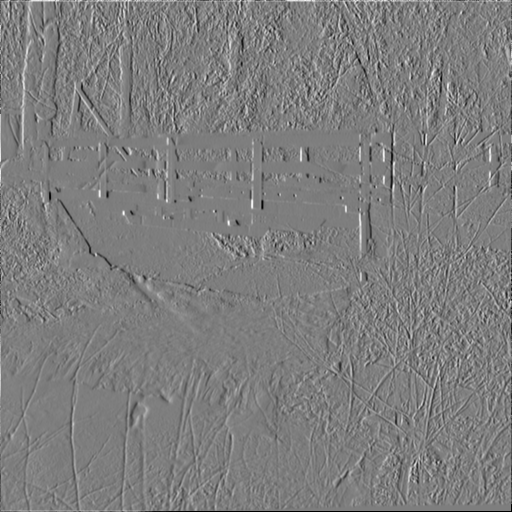

In [57]:
#Result for normalized image array after applying y gradient kernel
Image.open('Output/ndxgrey.pgm')